<h1>Index<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Data Aggregation

Put together all teams data in a single dataset.

In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [2]:
SAVING_PATH = "<YOUR_PATH>/datasets/ge_news"
def get_all_files_in_a_folder(team, full=False):
    path = "{}/data/{}".format(SAVING_PATH, team)
    
    files = [f for f in glob.glob(path + "**/*.csv", recursive=True)]
    
    if not full:
        files = [file.replace(path + "/", "") for file in files]
        files = [file.replace(".csv", "") for file in files]
    
    return files

def aggregate_all_saved_sections_from_zones_files(team):
    files = get_all_files_in_a_folder(team, full=True)
    
    all_dataframes = []
    for file in files:
        all_dataframes.append(pd.read_csv(file))
        
    return add_team_column(pd.concat(all_dataframes), team)

def add_team_column(data, team):
    data["club"] = team
    return data

In [3]:
teams = ["athletico-pr", "atletico-go", "atletico-mg",
         "bahia", "bragantino", "botafogo", "ceara",
         "corinthians", "coritiba", "flamengo", "fluminense", 
         "fortaleza", "goias", "gremio", "internacional", 
         "palmeiras", "santos", "sao-paulo", "sport", "vasco", "cruzeiro"]
    
teams_dataframes = [aggregate_all_saved_sections_from_zones_files(team) for team in teams]
data = pd.concat(teams_dataframes)
data["article_time"] = data["date"].apply(lambda x: x.strip().split(" ")[1] if not pd.isnull(x) else x)
data["article_date"] = data["date"].apply(lambda x: x.strip().split(" ")[0] if not pd.isnull(x) else x)


In [5]:
data["year-month"] = data["article_date"].apply(lambda x: x.split("/")[-1] + "-" + x.split("/")[1])

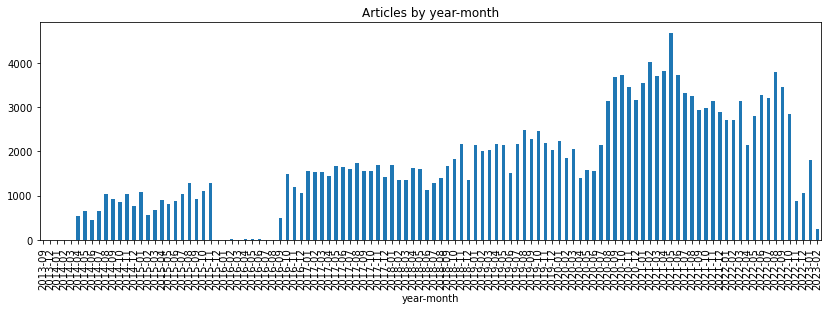

In [6]:
data.groupby("year-month")["title"].count().sort_index().plot(kind="bar",
                                                             figsize=(14, 4))
plt.title("Articles by year-month")
plt.show()

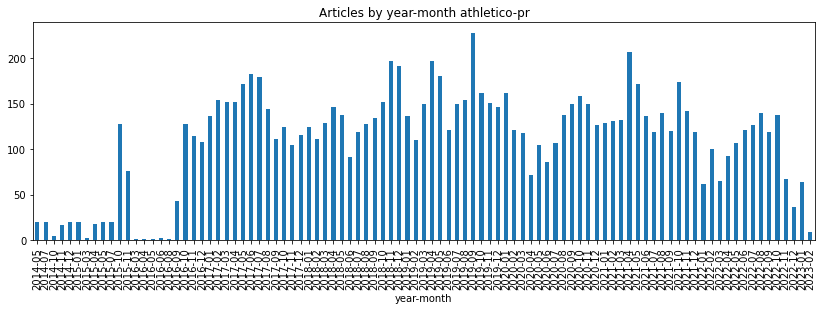

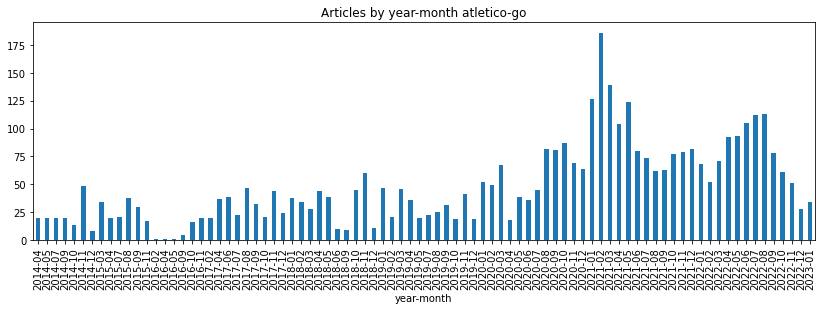

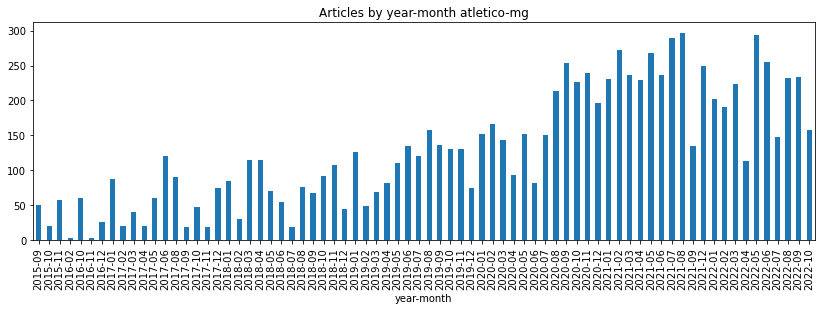

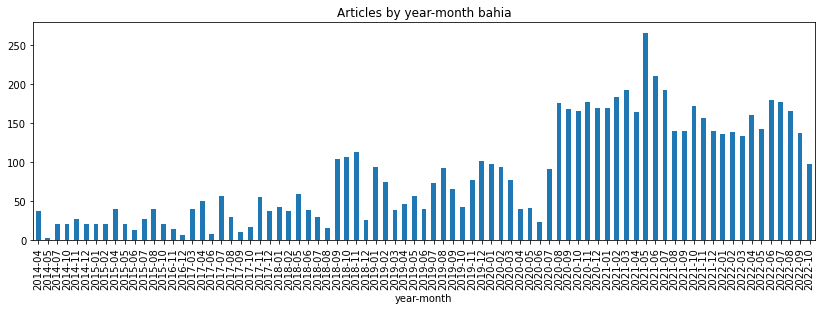

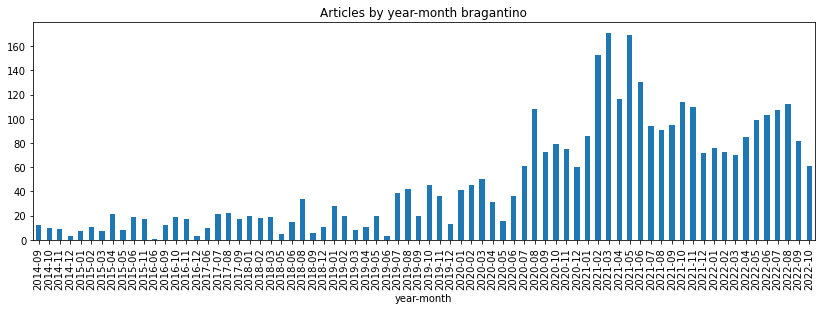

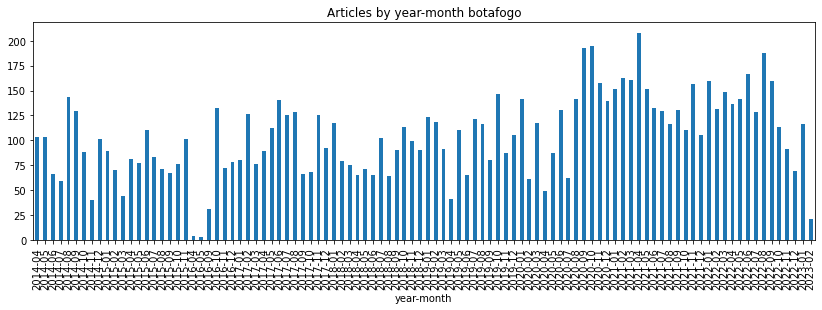

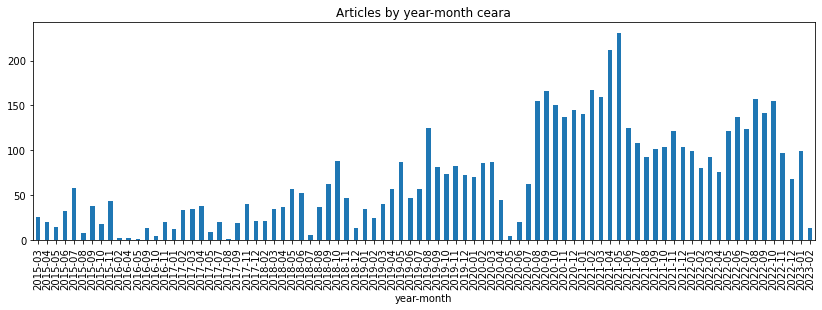

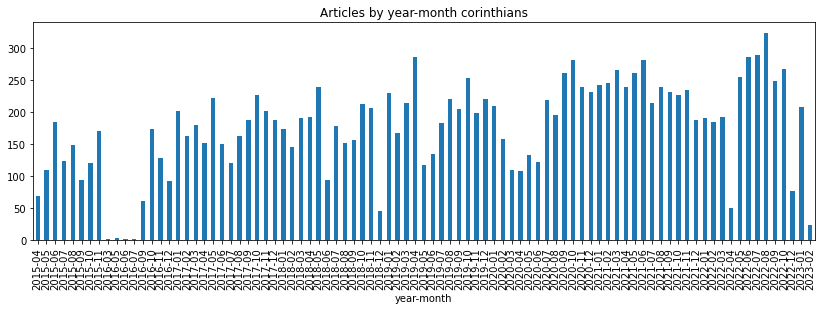

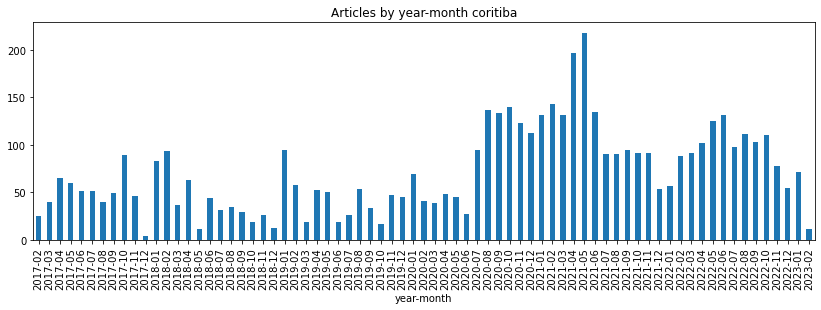

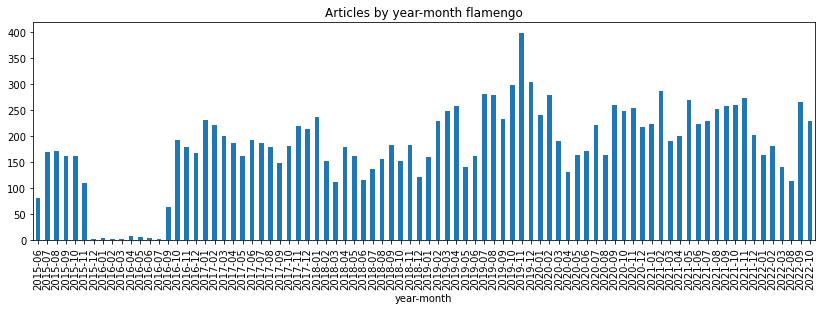

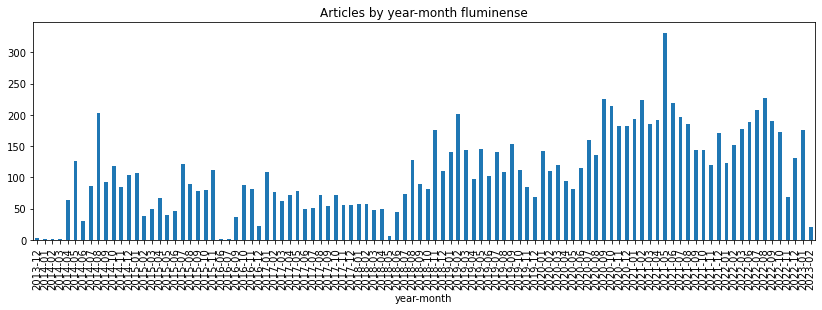

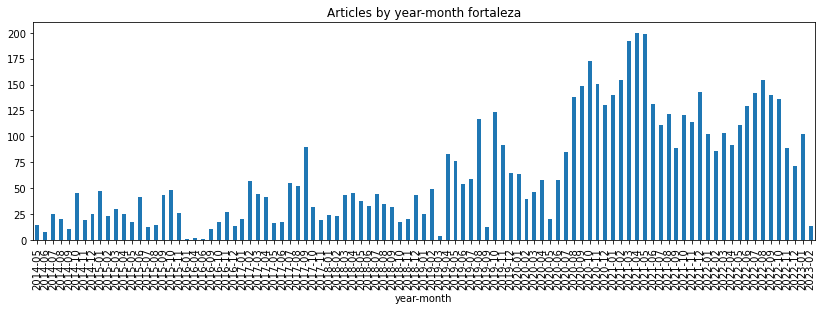

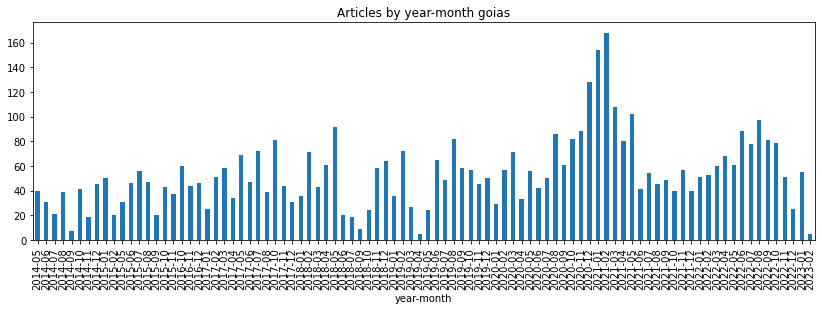

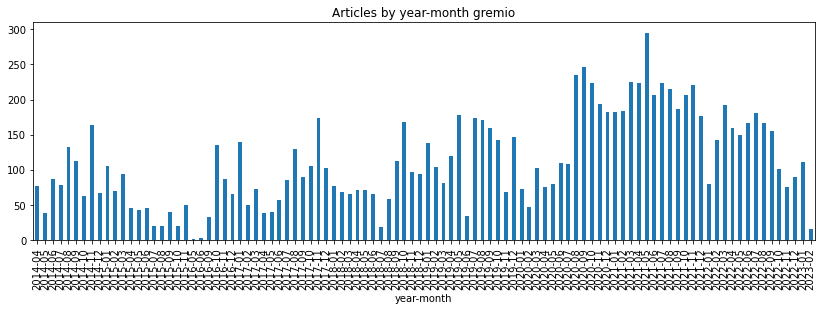

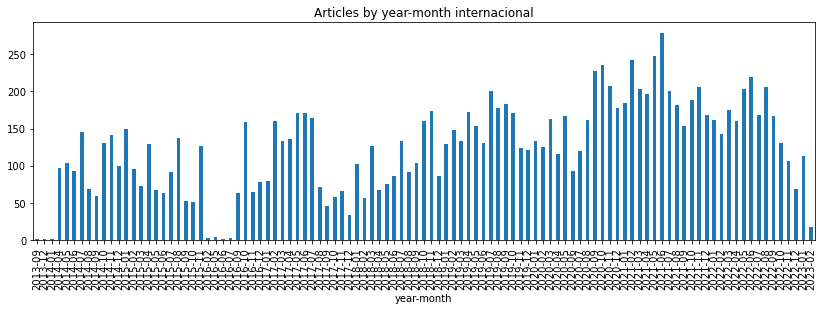

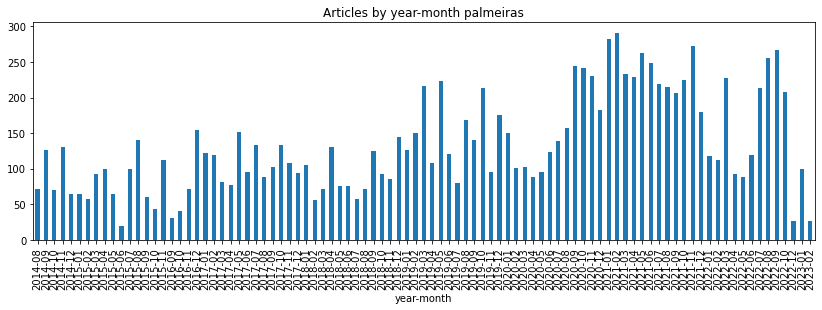

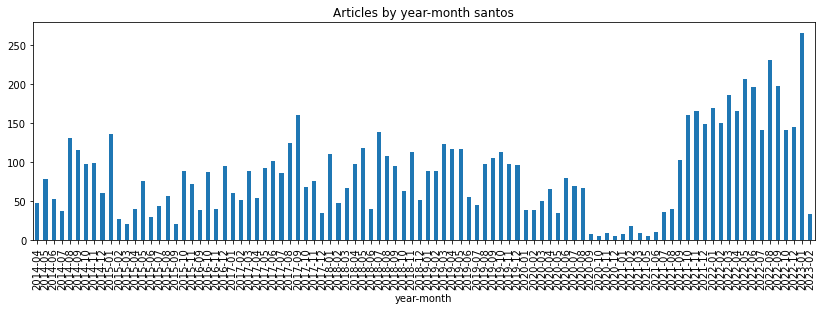

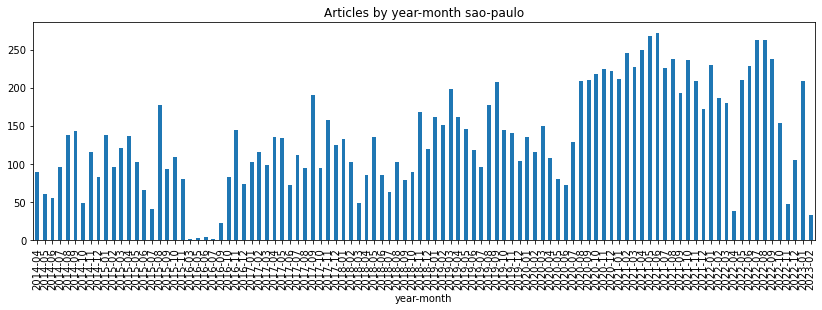

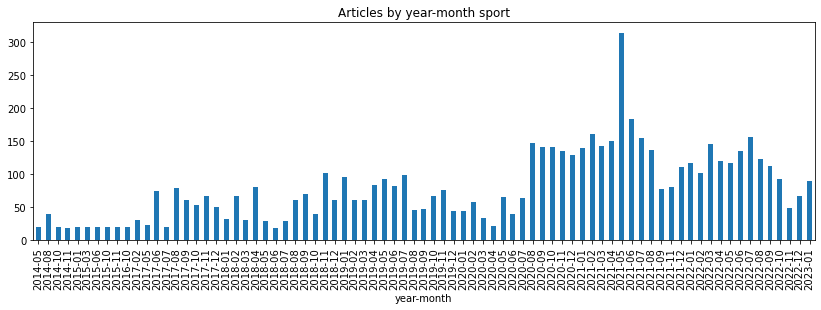

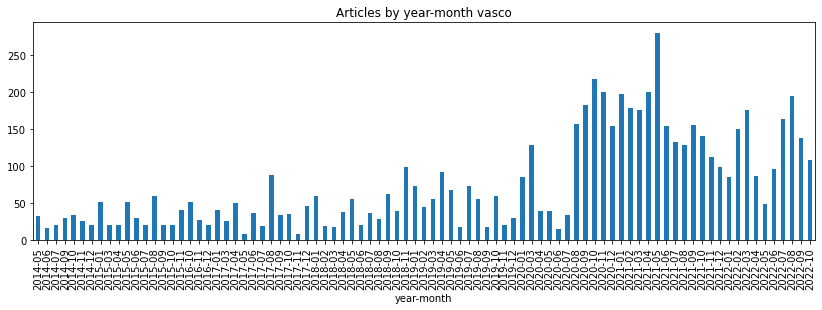

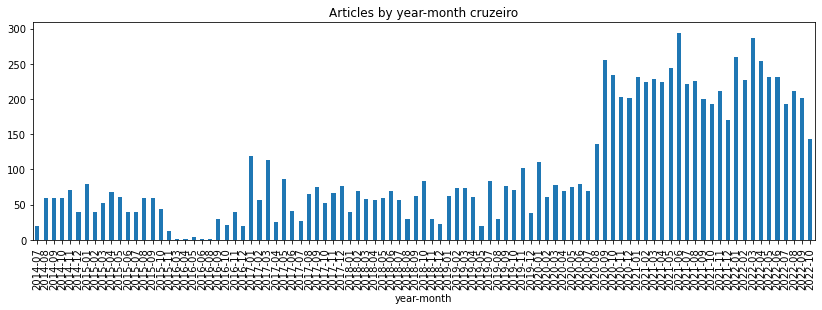

In [8]:
clubs = data["club"].unique()
for club in clubs:
    data[data["club"] == club].groupby("year-month")["title"].count().sort_index().plot(kind="bar",
                                                                 figsize=(14, 4))
    plt.title("Articles by year-month {}".format(club))
    plt.show()

In [12]:
data.groupby("club")["title"].count()

club
athletico-pr     10495
atletico-go       4127
atletico-mg       9571
bahia             6936
botafogo         10452
bragantino        3603
ceara             6016
corinthians      15788
coritiba          5238
cruzeiro          9600
flamengo         15156
fluminense       11093
fortaleza         6463
goias             4934
gremio           11258
internacional    13164
palmeiras        12404
santos            8179
sao-paulo        13770
sport             6229
vasco             6530
Name: title, dtype: int64

In [13]:
data = data.drop(columns=["date"]).rename(columns={"article_date": "date", 
                                                   "article_time": "time", 
                                                   "article_link": "link",
                                                   "article_text": "text"})

In [14]:
data = data[~pd.isnull(data["text"])]

In [15]:
data.shape

(191005, 7)

In [16]:
data.head()

,title,text,link,club,time,date,year-month
0,Convocados do Uruguai para a Copa do Mundo 202...,O técnico Diego Alonso divulgou a lista dos 2...,https://ge.globo.com/futebol/copa-do-mundo/not...,athletico-pr,19h55,10/11/2022,2022-11
0,Conmebol divulga tabela detalhada da pré e da ...,Argentinos são destaques no caminho dos brasi...,https://globoesporte.globo.com/futebol/liberta...,athletico-pr,10h04,22/12/2017,2017-12
0,"Com assistência, Demethryus recebe elogios no ...",O meia Demethryus conseguiu aproveitar bem a ...,https://globoesporte.globo.com/pr/futebol/time...,athletico-pr,08h00,11/02/2018,2018-02
0,Athletico confirma fim de contrato com Welling...,A reportagem do ge já havia adiantado que as ...,https://globoesporte.globo.com/pr/futebol/time...,athletico-pr,12h48,18/12/2020,2020-12
0,"Alô, cartoleiros! Atlético-PR passa limpo cont...","O atacante Marcelo Cirino, desfalque já nos ú...",https://globoesporte.globo.com/pr/futebol/time...,athletico-pr,22h17,13/09/2018,2018-09


In [17]:
data[["date", "time", "title", "text", "link", "club"]].to_csv("<YOUR_PATH>/ge_news/data/ge_news.csv", index=False)